<h1 style="text-align: center; color: purple;">Investment Grade Classification</h1>

This project aims to classify coporate companies into investment or non-investment grades.

The dataset is obtained form kaggle (https://www.kaggle.com/datasets/kirtandelwadia/corporate-credit-rating-withfinancial-ratios).

In [1]:
# Import relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data into df
df = pd.read_csv('corporateCreditRatingWithFinancialRatios.csv')
df.head(3)

Rating Agency                     Corporation Rating  \
0  Standard & Poor's Ratings Services       American States Water Co.     A-   
1  Standard & Poor's Ratings Services  Automatic Data Processing Inc.    AAA   
2  Standard & Poor's Ratings Services                      Avnet Inc.   BBB-   

  Rating Date      CIK  Binary Rating  SIC Code Sector Ticker  Current Ratio  \
0  2010-07-30  1056903              1    4941.0  Utils    AWR         1.1507   
1  2010-09-16     8670              1    7374.0  BusEq    ADP         1.1129   
2  2010-11-23     8858              1    5065.0  Shops    AVT         1.9276   

   ...  EBITDA Margin  Pre-Tax Profit Margin  Net Profit Margin  \
0  ...        28.9834                13.6093             8.3224   
1  ...        23.9379                20.8699            13.5690   
2  ...         3.6338                 3.0536             2.1418   

   Asset Turnover  ROE - Return On Equity  Return On Tangible Equity  \
0          0.3173                  8.1724                     8.1978   
1          0.3324                 22.0354                    47.2858   
2          2.4620                 13.6376                    16.7991   

   ROA - Return On Assets  ROI - Return On Investment  \
0                  2.6385                      4.4530   
1                  4.4944                     21.8765   
2                  5.2731                      9.6494   

   Operating Cash Flow Per Share  Free Cash Flow Per Share  
0                         1.9957                   -0.1333  
1                         0.2501                    0.3132  
2                        -7.6079                   -7.3231  

[3 rows x 25 columns]

In [3]:
# Checking for the features in dataframe
print(df.shape)
print(df.columns)

(7805, 25)
Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share'],
      dtype='object')


From the dataset info, companies are classified based on credit rating
- **> BB+ :** Investment Grade,
- **< BB+ :** Non-investment Grade (Junk).



Credit Ratings are determined by Financial Ratios coming from 
- Balance Sheets
- Income Statements
- Cash-Flow Statements.


In [4]:
# Creating X dataframe by dropping irrelevant features (non-financial features)
X = df.drop(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker'], axis=1)

# Creating target (Y) dataframe. Binary Rating are classified as 0 (junk) and 1 (investment grade)
Y = df[['Binary Rating']]

display(X.head(3))
display(Y.head(3))

Current Ratio  Long-term Debt / Capital  Debt/Equity Ratio  Gross Margin  \
0         1.1507                    0.4551             0.8847       77.6230   
1         1.1129                    0.0072             0.0073       43.6619   
2         1.9276                    0.2924             0.4255       11.9008   

   Operating Margin  EBIT Margin  EBITDA Margin  Pre-Tax Profit Margin  \
0           19.4839      19.4839        28.9834                13.6093   
1           19.8327      19.8327        23.9379                20.8699   
2            3.3173       3.3173         3.6338                 3.0536   

   Net Profit Margin  Asset Turnover  ROE - Return On Equity  \
0             8.3224          0.3173                  8.1724   
1            13.5690          0.3324                 22.0354   
2             2.1418          2.4620                 13.6376   

   Return On Tangible Equity  ROA - Return On Assets  \
0                     8.1978                  2.6385   
1                    47.2858                  4.4944   
2                    16.7991                  5.2731   

   ROI - Return On Investment  Operating Cash Flow Per Share  \
0                      4.4530                         1.9957   
1                     21.8765                         0.2501   
2                      9.6494                        -7.6079   

   Free Cash Flow Per Share  
0                   -0.1333  
1                    0.3132  
2                   -7.3231

Binary Rating
0              1
1              1
2              1

In [5]:
# Describing and checking the statistics of X data
print(X.shape)
X.describe().T

(7805, 16)


count       mean         std         min  \
Current Ratio                  7805.0   1.926313    1.921651      0.1749   
Long-term Debt / Capital       7805.0   0.452804    2.629158    -86.3636   
Debt/Equity Ratio              7805.0   0.177349   34.456334  -1473.0980   
Gross Margin                   7805.0  42.433909   23.742020    -87.6840   
Operating Margin               7805.0  11.531612   25.469044   -461.7878   
EBIT Margin                    7805.0  11.582683   25.483934   -461.7878   
EBITDA Margin                  7805.0  20.071493   24.380407   -360.8169   
Pre-Tax Profit Margin          7805.0   8.659944   27.866408   -476.0100   
Net Profit Margin              7805.0   5.995566   24.055577   -414.8248   
Asset Turnover                 7805.0   0.849843    0.696204      0.0684   
ROE - Return On Equity         7805.0  15.950507  230.592526 -11258.2100   
Return On Tangible Equity      7805.0  21.481589  462.734075 -14023.2600   
ROA - Return On Assets         7805.0   4.575705    9.229899   -226.4425   
ROI - Return On Investment     7805.0   7.076084   24.382027   -745.4545   
Operating Cash Flow Per Share  7805.0   0.479756    6.050626    -91.3302   
Free Cash Flow Per Share       7805.0   0.119491    7.253660   -130.6658   

                                   25%      50%      75%        max  
Current Ratio                   1.0773   1.4968   2.1610    34.0768  
Long-term Debt / Capital        0.2865   0.4272   0.5422   171.5000  
Debt/Equity Ratio               0.4197   0.7528   1.2116   194.3750  
Gross Margin                   22.4539  39.6354  59.6417   100.0000  
Operating Margin                6.0982  12.1201  19.4646    93.9930  
EBIT Margin                     6.1811  12.1558  19.5399    93.9930  
EBITDA Margin                  11.1621  18.3045  30.6616   286.4935  
Pre-Tax Profit Margin           4.0087   9.7051  16.6769   221.2894  
Net Profit Margin               2.6371   6.9389  12.3667   219.3903  
Asset Turnover                  0.3995   0.6612   1.0388     8.5039  
ROE - Return On Equity          6.0228  12.5000  20.5157  7038.4610  
Return On Tangible Equity     -12.2339  10.5641  26.8941  9882.9790  
ROA - Return On Assets          2.3919   4.7675   7.8813   114.7169  
ROI - Return On Investment      3.6926   7.4408  12.5151   466.6667  
Operating Cash Flow Per Share  -0.4485   0.2378   1.0888   282.1921  
Free Cash Flow Per Share       -0.7237   0.1335   0.9978   107.7377

In [6]:
# Splitting features and target data for training and testing. Test size 20% of data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Printing the shapes of train and test data
print ("Shape of X_train = ",X_train.shape)
print ("Shape of Y_train = ",Y_train.shape)
print ("Shape of X_test = ",X_test.shape)
print ("Shape of Y_test = ",Y_test.shape)

Shape of X_train =  (6244, 16)
Shape of Y_train =  (6244, 1)
Shape of X_test =  (1561, 16)
Shape of Y_test =  (1561, 1)


In [7]:
# Creating new dataframe x_y to include target variable
x_y = X_train.copy()
x_y['Target'] = Y_train

# Describing dataframe for understanding
display(x_y.describe().T)

count       mean         std         min  \
Current Ratio                  6244.0   1.925550    1.893631      0.1749   
Long-term Debt / Capital       6244.0   0.433540    1.635470    -86.3636   
Debt/Equity Ratio              6244.0   0.254406   35.731023  -1473.0980   
Gross Margin                   6244.0  42.579327   23.707406    -87.6840   
Operating Margin               6244.0  11.367802   26.916167   -461.7878   
EBIT Margin                    6244.0  11.422320   26.935687   -461.7878   
EBITDA Margin                  6244.0  19.993933   25.435834   -360.8169   
Pre-Tax Profit Margin          6244.0   8.515592   28.999730   -476.0100   
Net Profit Margin              6244.0   5.840853   25.102095   -414.8248   
Asset Turnover                 6244.0   0.850663    0.696265      0.0684   
ROE - Return On Equity         6244.0  15.750190  228.734915 -11258.2100   
Return On Tangible Equity      6244.0  18.792118  468.698423 -14023.2600   
ROA - Return On Assets         6244.0   4.520036    9.495496   -226.4425   
ROI - Return On Investment     6244.0   6.924324   23.816604   -745.4545   
Operating Cash Flow Per Share  6244.0   0.474564    6.440596    -91.3302   
Free Cash Flow Per Share       6244.0   0.062362    7.083457   -130.6658   
Target                         6244.0   0.652306    0.476276      0.0000   

                                     25%       50%      75%        max  
Current Ratio                   1.077300   1.49680   2.1676    34.0768  
Long-term Debt / Capital        0.284500   0.42505   0.5379    17.3667  
Debt/Equity Ratio               0.413200   0.75260   1.2153   194.3750  
Gross Margin                   22.519075  39.65105  60.0538   100.0000  
Operating Margin                6.124875  12.12010  19.4654    93.9930  
EBIT Margin                     6.231450  12.15235  19.5399    93.9930  
EBITDA Margin                  11.165025  18.30450  30.8490   286.4935  
Pre-Tax Profit Margin           4.010725   9.72645  16.6769   221.2894  
Net Profit Margin               2.624975   6.93720  12.3667   219.3903  
Asset Turnover                  0.398600   0.65980   1.0459     8.5039  
ROE - Return On Equity          6.099300  12.44255  20.6074  7038.4610  
Return On Tangible Equity     -12.273750  10.46150  26.7307  9882.9790  
ROA - Return On Assets          2.356225   4.78470   7.9284   114.7169  
ROI - Return On Investment      3.646225   7.46140  12.5937   271.2191  
Operating Cash Flow Per Share  -0.463700   0.21780   1.0748   282.1921  
Free Cash Flow Per Share       -0.750800   0.10880   0.9743   107.7377  
Target                          0.000000   1.00000   1.0000     1.0000

In [8]:
x_y.head(2)

Current Ratio  Long-term Debt / Capital  Debt/Equity Ratio  \
2398         0.5869                    0.4079             0.7760   
6198         2.5231                    0.3097             0.4486   

      Gross Margin  Operating Margin  EBIT Margin  EBITDA Margin  \
2398       79.8715           28.2715      28.2715        49.0202   
6198       23.4779           17.1693      17.1693        23.4480   

      Pre-Tax Profit Margin  Net Profit Margin  Asset Turnover  \
2398                26.1512            21.2503          0.3983   
6198                17.0366            11.7042          1.0441   

      ROE - Return On Equity  Return On Tangible Equity  \
2398                 26.1624                    51.8881   
6198                 25.8423                    32.3024   

      ROA - Return On Assets  ROI - Return On Investment  \
2398                  9.4799                     15.4374   
6198                 12.2207                     17.8401   

      Operating Cash Flow Per Share  Free Cash Flow Per Share  Target  
2398                        -2.4137                    1.8807       1  
6198                         1.8522                    1.6730       1

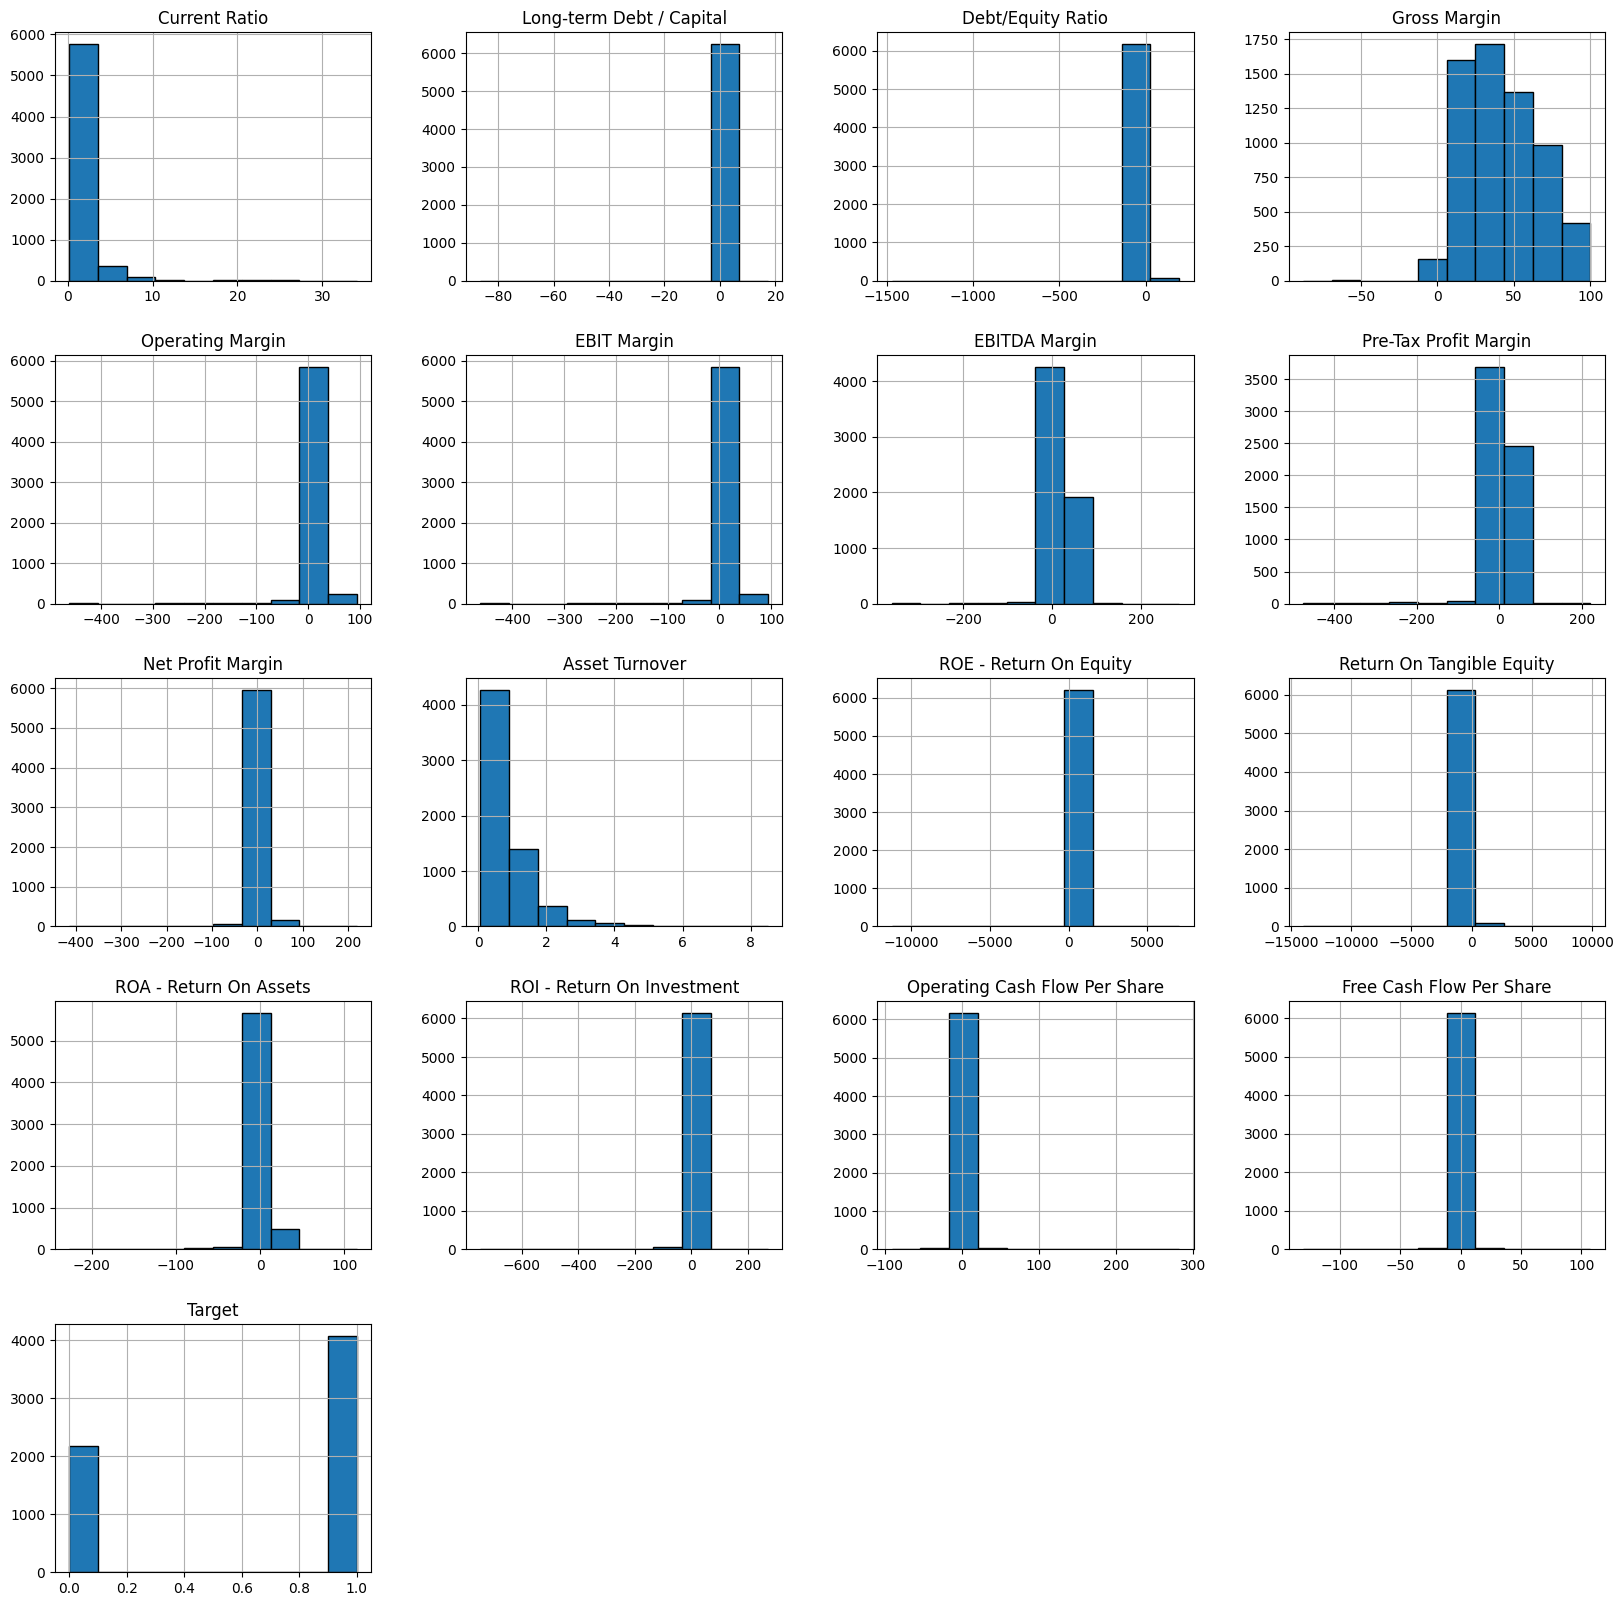

In [9]:
# Plotting histogram for better data understanding
x_y.hist(figsize=(20,20),bins=10, edgecolor='black')
plt.show()

## Naive Bayes Classifier

In [10]:
# Create Naive Bayes Classifier model

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Show the score of NB model
print("score :",nb.score(X_test,Y_test))

score : 0.6777706598334401


Naive Bayes Classification Report: 

              precision    recall  f1-score   support

           0       0.63      0.14      0.23       535
           1       0.68      0.96      0.80      1026

    accuracy                           0.68      1561
   macro avg       0.66      0.55      0.52      1561
weighted avg       0.66      0.68      0.60      1561



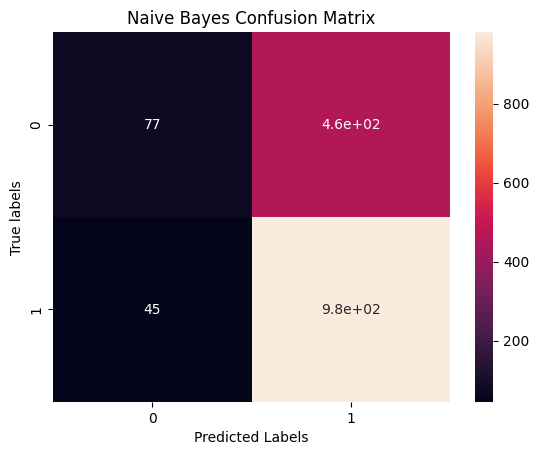

In [11]:
# Pedicting target values using NB model
y_pred_nb = nb.predict(X_test)


# Classification Report of the NB model
cr_nb = classification_report(Y_test,y_pred_nb)
print('Naive Bayes Classification Report: \n')
print (cr_nb)

# Confusion Matrix of the NB model
cm_nb = confusion_matrix(Y_test, y_pred_nb)
ax1= plt.subplot()
sns.heatmap(cm_nb, annot=True, ax=ax1);  #changes with the classification problem
# labels, title and ticks
ax1.set_xlabel('Predicted Labels');ax1.set_ylabel('True labels');
ax1.set_title('Naive Bayes Confusion Matrix');

## Decision Trees

In [12]:
# Optimising Decision Tree

#perform cross validation
from sklearn.model_selection import cross_val_score
score = [] #store the CV scores
depths = range(2,30)
for depth in depths:
  dt= DecisionTreeClassifier(max_depth=depth, criterion = 'entropy')
  val_scores = cross_val_score(dt, X_train, Y_train, cv=10) #this is a CV element array
  score.append(val_scores.mean()) #average cross validation performance

Text(0, 0.5, 'DT Accuracy')

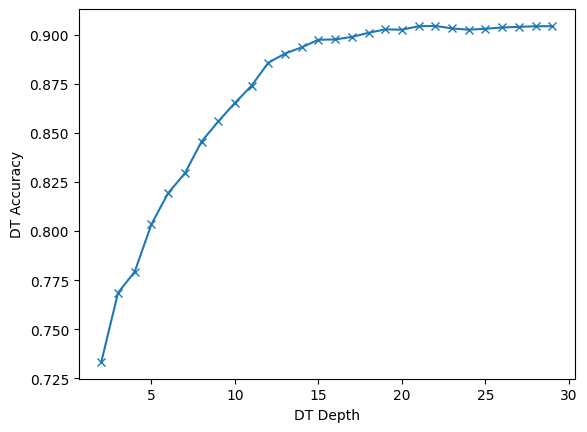

In [13]:
# plotting the training and validation score of each number of depth
plt.plot(depths,score,'x-')
plt.xlabel('DT Depth')
plt.ylabel('DT Accuracy')

In [14]:
# Finding the number of depth that gives the best score
optimal_depth = depths[np.argmax(score)]
print('Number of depth for optimal result:', optimal_depth)

# Creating Decision Tree object with the optimal depth
dt= DecisionTreeClassifier(max_depth=optimal_depth, criterion ='entropy')
dt.fit(X_train,Y_train) #including both training and validation data
print("score :",dt.score(X_test,Y_test))

Number of depth for optimal result: 22
score : 0.9083920563741191


In [15]:
# Displaying the Decision Tree model

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X_train.columns,
                class_names=['junk','investment'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#graph.write_png('DT1.png')
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.933453 to fit



In [16]:
# Show the Classification Report of the Decision Tree model


Y_pred = dt.predict(X_test) #this is the trained decision tree
cr = classification_report(Y_test,Y_pred)
print('Decision Tree Classification Report: \n')
print(cr)

Decision Tree Classification Report: 

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       535
           1       0.94      0.92      0.93      1026

    accuracy                           0.91      1561
   macro avg       0.90      0.90      0.90      1561
weighted avg       0.91      0.91      0.91      1561



[[478  57]
 [ 86 940]]


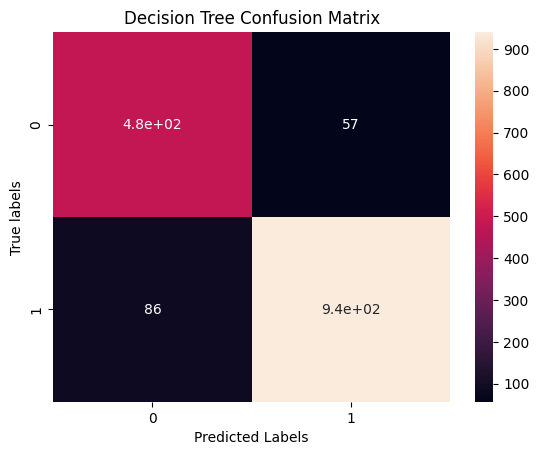

In [17]:
# Show the Confusion Matrix of the Decision Tree model

cm = confusion_matrix(Y_test, Y_pred) #actual labels, predicted labels
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Decision Tree Confusion Matrix');